<a href="https://colab.research.google.com/github/TUIlmenauAMS/MandelbrotSet/blob/main/apfelmaennchen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mandelbrot Set (Apfelmaennchen)
* Set the center position and image width below. 
* Then click on the run button.
* The coordinates can be seen at the boundaries of plotted image. 
* Uses the iteration $z_{n+1}=z_{n}^2 + c$
* With $c$: Staring point (pixel) in the complex plane below.
* The number of iterations to reach $|z| \geq 4$ is plotted as color for each pixel $c$.
* The options below generate different zoom images, after re-running with the play button on the left. 
* For the "Manual" option:
* "xcenter" is the center of the real axis, "ycenter" is the center of the imaginary axis, "width" is the range of values for both.
* Try for instance: xcenter: -0.1, ycenter: 0.95, with: 0.2 (then run with the play button)
* Global view: xcenter: -0.2, ycenter: 0.0, width: 3.0


Erzeugt ein Bild vom Apfelmaennchen (Mandelbrot set) 

Populating the interactive namespace from numpy and matplotlib


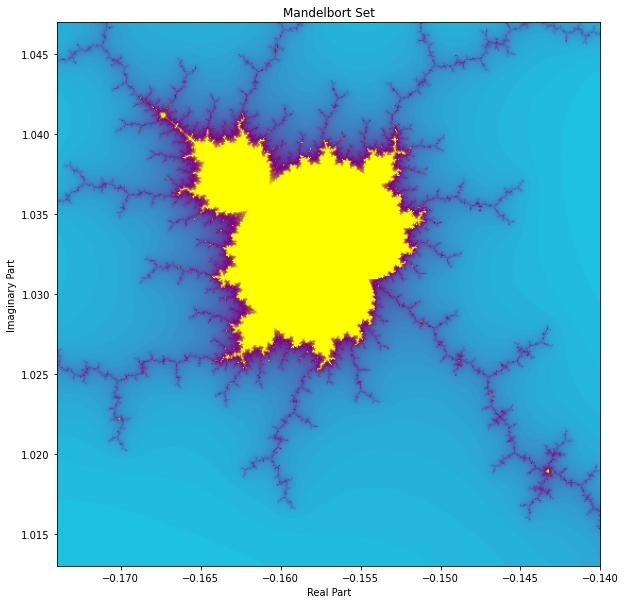

In [9]:
#@ { run: "auto" }

#Apfemaennchen programm, more precisely: mandelbrot set.
#Gerald Schuller, February 2021

import numpy as np
import matplotlib.pyplot as plt
#import plotly.tools as tls
#import plotly.offline

print("Erzeugt ein Bild vom Apfelmaennchen (Mandelbrot set) \n");

Nx=512; #resolution in pixels
Ny=512;

#Position of image:
#xcenter=-0.2 #center of image
#xcenter=-0.1
#ycenter=0.0
#ycenter=0.95
#width=3 #width of image
#width= 0.2

option = "Zoom3" #@param ["Global", "Zoom1", "Zoom2", "Zoom3", "Manual"]
if option == "Global":
   xcenter=-0.2; ycenter=0.0; width=3.0;
elif option == "Zoom1":
   xcenter=-0.1; ycenter=0.95; width=0.2;
elif option == "Zoom2":
   xcenter=-0.75; ycenter=0.15; width=0.2;
elif option == "Zoom3":
   xcenter=-0.157; ycenter=1.03; width=0.034;
elif  option == "Manual":  
   xcenter = -0.2  #@param {type:"number"}
   ycenter = 0.0 #@param {type:"number"}
   width =  3.0#@param {type:"number"}

xmin=xcenter-width/2
xmax=xcenter+width/2
ymin=ycenter-width/2
ymax=ycenter+width/2

#xmin=-1.7;
#xmax=1.3;
#ymin=-1.5;
#ymax=1.5;
limit=100;  #maximum number of interations, higher is better for larger zoom ins


image=np.ones((Nx,Ny,3))*0.1
[ix,iy,c]=image.shape

#print(c)
dx=(xmax-xmin)/Nx;
dy=(ymax-ymin)/Ny;
for x in range(Nx):
    for y in range(Ny):
       #set starting point in complex domain between -2 and 2:
       realpart=xmin+x*dx; #real part of starting point of iteration
       imaginary=ymax-y*dy; #imaginary part of starting point of iteration
       c=realpart + 1j*imaginary  #complex valued starting point

       #start iteration:
       z=0;
       it=0
       limit=100
       while (it< limit) and abs(z)<4:
          it=it+1
          z=z*z+c
       
       normiter=it/limit;
       #print("ma=", ma)
       image[y,x,0]=normiter;
       image[y,x,1]=np.abs(1-2*normiter)
       image[y,x,2]=np.abs(1-normiter)
       #Pygame:
       #screen.set_at((x,y),255*image[y,x,:])
       
    #pygame.display.flip()

#Matplotlib:
#%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 10)

#fig, ax = plt.subplots(1,1) 
plt.imshow(image, aspect='equal', extent=[xmin,xmax,ymin,ymax])
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Mandelbort Set')
plt.show()
